In [2]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.stack(successive_outputs, axis=0)
print(final_output_sequence)

[[0.99999985 0.99999999 0.99999913 ... 1.         0.99999999 0.99999986]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


Epoch 1/10
157/157 [==============================] - 14s 87ms/step - loss: 0.6124 - acc: 0.6541 - val_loss: 0.4812 - val_acc: 0.7834
Epoch 2/10
157/157 [==============================] - 14s 86ms/step - loss: 0.3824 - acc: 0.8400 - val_loss: 0.4344 - val_acc: 0.8092
Epoch 3/10
157/157 [==============================] - 14s 90ms/step - loss: 0.2903 - acc: 0.8870 - val_loss: 0.3625 - val_acc: 0.8438
Epoch 4/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2279 - acc: 0.9133 - val_loss: 0.3866 - val_acc: 0.8612
Epoch 5/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2949 - acc: 0.9000 - val_loss: 0.3584 - val_acc: 0.8618
Epoch 6/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1493 - acc: 0.9449 - val_loss: 0.4645 - val_acc: 0.8378
Epoch 7/10
157/157 [==============================] - 14s 90ms/step - loss: 0.1049 - acc: 0.9643 - val_loss: 0.4147 - val_acc: 0.8514
Epoch 8/10
157/157 [==============================] - 14s 92ms

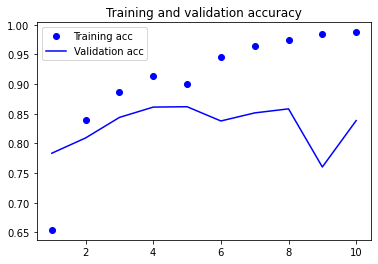

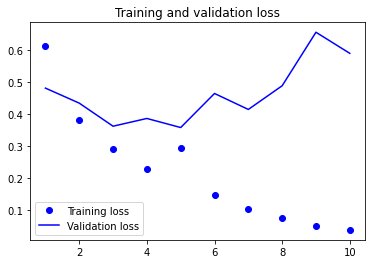

In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/10
157/157 [==============================] - 32s 206ms/step - loss: 0.5026 - acc: 0.7581 - val_loss: 0.5597 - val_acc: 0.7640
Epoch 2/10
157/157 [==============================] - 30s 194ms/step - loss: 0.3039 - acc: 0.8816 - val_loss: 0.4247 - val_acc: 0.8346
Epoch 3/10
157/157 [==============================] - 32s 201ms/step - loss: 0.2420 - acc: 0.9087 - val_loss: 0.4334 - val_acc: 0.8322
Epoch 4/10
157/157 [==============================] - 31s 198ms/step - loss: 0.2048 - acc: 0.9250 - val_loss: 0.3601 - val_acc: 0.8838
Epoch 5/10
157/157 [==============================] - 31s 197ms/step - loss: 0.1788 - acc: 0.9360 - val_loss: 0.3558 - val_acc: 0.8624
Epoch 6/10
157/157 [==============================] - 33s 207ms/step - loss: 0.1631 - acc: 0.9413 - val_loss: 0.3251 - val_acc: 0.8676
Epoch 7/10
157/157 [==============================] - 32s 206ms/step - loss: 0.1458 - acc: 0.9476 - val_loss: 0.3459 - val_acc: 0.8790
Epoch 8/10
157/157 [==============================] - 3

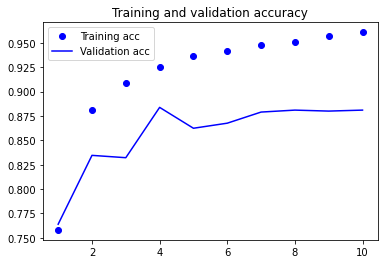

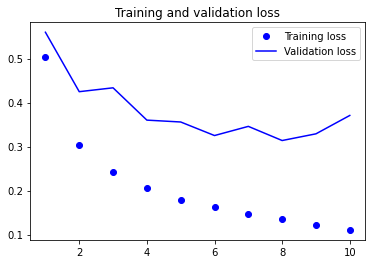

In [10]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()